<a href="https://colab.research.google.com/github/Erike-Simon/CESAR-AED/blob/main/MinText_Aula03_Modelagem_de_caracteristicas_textuais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Pré processamento da base de dados fetch_20newsgroups

In [ ]:
from sklearn.datasets import fetch_20newsgroups

raw_documents = fetch_20newsgroups(subset='all', return_X_y=True)
documents = raw_documents[0]

In [ ]:
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
#  'CountVectorizer' é uma ferramenta útil para transformar um conjunto de documentos de texto em uma matriz de contagem de termos
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(stop_words='english') # stop_words='english' indica que o vetorizador deve remover palavras comuns da língua inglesa
count_vect.fit(documents) # Ajusta o vetorizador aos documentos fornecidos. A função fit analisa os documentos e constrói o vocabulário, que é uma
                          # lista de todos os termos únicos presentes nos documentos.
len(count_vect.vocabulary_) # O vocabulário é um dicionário onde as chaves são os termos únicos e os valores são os
                            # índices associados a esses termos na matriz de contagem.

173451

In [ ]:
print(f" quant palavras da base completa {sum([doc[1] for doc in count_vect.vocabulary_.items()])}")

 quant palavras da base completa 15042537975


Base de treinamento

In [ ]:
raw_documents_train = fetch_20newsgroups(subset='train', return_X_y=True)
documents = raw_documents_train[0]

count_vect = CountVectorizer(stop_words='english')
count_vect.fit(documents)

print(f"Temos {len(count_vect.vocabulary_)} documentos e {sum([doc[1] for doc in count_vect.vocabulary_.items()])} palavras")
print(f"{documents[0]}")

'could enlighten car saw day'

Temos 129796 documentos e 8423435910 palavras
From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







'could enlighten car saw day'

In [ ]:
for i, (token, count) in enumerate(count_vect.vocabulary_.items()):
  print(f"{token} - {count}")
  if i ==20:
    break

lerxst - 75215
wam - 122887
umd - 118013
edu - 50455
thing - 114439
subject - 111094
car - 37722
nntp - 87451
posting - 94962
host - 63970
rac3 - 98748
organization - 90192
university - 118714
maryland - 79519
college - 40939
park - 91885
lines - 75888
15 - 4605
wondering - 124627
enlighten - 51714
saw - 104609


Remover stopword e tokinize

In [ ]:
import nltk
nltk.download('punkt') # "punkt" é um tokenizador que segmenta o texto em palavras.
from nltk.tokenize import word_tokenize # importa a função word_tokenize do módulo nltk.tokenize.
                                        # Essa função é usada para dividir um texto em palavras

from nltk.corpus import stopwords
nltk.download('stopwords')
list_stop = stopwords.words('english')

documents_tokens = []
for doc in documents:
    # Cria uma lista de tokens convertidos para minúsculas ('.lower()') e exclui aqueles que estão na lista de stop words
    documents_tokens.append(
        [token.lower() for token in word_tokenize(doc, language='english') if not token.lower()  in list_stop]
    )

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
documents_tokens[0][:10] # observando os 10 primeiros tokens do 1 documento

[':', 'lerxst', '@', 'wam.umd.edu', '(', "'s", 'thing', ')', 'subject', ':']

In [ ]:
pre_processed_documents = [' '.join(doc) for doc in documents_tokens]
print(pre_processed_documents[0])

: lerxst @ wam.umd.edu ( 's thing ) subject : car ! ? nntp-posting-host : rac3.wam.umd.edu organization : university maryland , college park lines : 15 wondering anyone could enlighten car saw day . 2-door sports car , looked late 60s/ early 70s . called bricklin . doors really small . addition , front bumper separate rest body . know . anyone tellme model name , engine specs , years production , car made , history , whatever info funky looking car , please e-mail . thanks , - il -- -- brought neighborhood lerxst -- --


**max_df : float in range [0.0, 1.0] or int, default=1.0**
> When building the vocabulary ignore terms that have a document frequency strictly higher than the given threshold (corpus-specific stop words). If float, the parameter represents a proportion of documents, integer absolute counts. This parameter is ignored if vocabulary is not None.

**min_df : float in range [0.0, 1.0] or int, default=1**  
> When building the vocabulary ignore terms that have a document frequency strictly lower than the given threshold. This value is also called cut-off in the literature. If float, the parameter represents a proportion of documents, integer absolute counts. This parameter is ignored if vocabulary is not None.

**max_features : int, default=None**
> If not None, build a vocabulary that only consider the top max_features ordered by term frequency across the corpus. Otherwise, all features are used.

In [ ]:
# Os parâmetros em 'CountVectorizer' ajudam a controlar o tamanho e a relevância do vocabulário, removendo palavras muito comuns ou muito raras, o que pode melhorar
# a eficácia de alguns modelos de aprendizado de máquina. Essas escolhas dependem da natureza específica dos seus dados e dos objetivos da análise
count_vect = CountVectorizer(stop_words=None, min_df=0.005, max_df=0.5, max_features=3000)
count_vect.fit(pre_processed_documents)

print(f"Temos {len(count_vect.vocabulary_)} termos únicos no vocabulario e {sum([doc[1] for doc in count_vect.vocabulary_.items()])} palavras")

Temos 3000 documentos e 4498500 palavras


In [ ]:
# Ordenando os termos
sorted(count_vect.vocabulary_.items(), reverse=False)

[('00', 0),
 ('000', 1),
 ('01', 2),
 ('02', 3),
 ('03', 4),
 ('04', 5),
 ('05', 6),
 ('06', 7),
 ('07', 8),
 ('08', 9),
 ('09', 10),
 ('10', 11),
 ('100', 12),
 ('1000', 13),
 ('11', 14),
 ('12', 15),
 ('120', 16),
 ('128', 17),
 ('129', 18),
 ('13', 19),
 ('130', 20),
 ('14', 21),
 ('140', 22),
 ('145', 23),
 ('15', 24),
 ('150', 25),
 ('16', 26),
 ('17', 27),
 ('18', 28),
 ('19', 29),
 ('1920', 30),
 ('1982', 31),
 ('1983', 32),
 ('1988', 33),
 ('1989', 34),
 ('1990', 35),
 ('1991', 36),
 ('1992', 37),
 ('1993', 38),
 ('1993apr14', 39),
 ('1993apr15', 40),
 ('1993apr16', 41),
 ('1993apr17', 42),
 ('1993apr19', 43),
 ('1993apr20', 44),
 ('1993apr21', 45),
 ('1993apr5', 46),
 ('1993apr6', 47),
 ('1st', 48),
 ('20', 49),
 ('200', 50),
 ('2000', 51),
 ('21', 52),
 ('22', 53),
 ('23', 54),
 ('24', 55),
 ('241', 56),
 ('25', 57),
 ('250', 58),
 ('256', 59),
 ('26', 60),
 ('27', 61),
 ('28', 62),
 ('286', 63),
 ('29', 64),
 ('2nd', 65),
 ('30', 66),
 ('300', 67),
 ('301', 68),
 ('31', 69),


### Extração de caracteristicas TF-IDF

Essa transformação é útil para converter texto em uma forma que modelos de aprendizado de máquina possam entender, permitindo que você aplique algoritmos de aprendizado de máquina aos seus dados de texto.

In [ ]:
# A variável X agora contém uma representação vetorial dos documentos,
# onde cada linha representa um documento e cada coluna representa uma palavra única.
# A matriz X é uma matriz esparsa (sparse matrix), que é uma representação eficiente para matrizes com muitos zeros.
X = count_vect.transform(pre_processed_documents)
print(X[0, :])

  (0, 24)	1
  (0, 192)	1
  (0, 270)	2
  (0, 443)	1
  (0, 474)	1
  (0, 504)	1
  (0, 518)	5
  (0, 632)	1
  (0, 720)	1
  (0, 782)	1
  (0, 889)	1
  (0, 914)	1
  (0, 958)	1
  (0, 1158)	1
  (0, 1298)	1
  (0, 1320)	1
  (0, 1352)	1
  (0, 1381)	1
  (0, 1494)	1
  (0, 1514)	1
  (0, 1596)	1
  (0, 1597)	1
  (0, 1618)	1
  (0, 1621)	1
  (0, 1648)	1
  (0, 1727)	1
  (0, 1781)	1
  (0, 1826)	1
  (0, 1942)	1
  (0, 2026)	1
  (0, 2058)	1
  (0, 2104)	1
  (0, 2189)	1
  (0, 2262)	1
  (0, 2333)	1
  (0, 2394)	1
  (0, 2477)	1
  (0, 2521)	1
  (0, 2532)	1
  (0, 2681)	1
  (0, 2685)	1
  (0, 2791)	2
  (0, 2807)	1
  (0, 2923)	1
  (0, 2958)	1
  (0, 2989)	1


Significa que no primeiro documento (índice 0), os termos nas posições 24 e 192 tem contagem de 1 e o termo na posição 270 tem contagem de 2, e assim por diante. Os números entre parênteses indicam as coordenadas (linha, coluna) e o valor associado.

Essa representação é chamada de matriz de contagem de termos ou *Bag of Words* (saco de palavras), e cada valor na matriz indica quantas vezes uma determinada palavra (representada pela coluna) aparece no documento (representado pela linha).

In [ ]:
# significa que a matriz tem 11.314 linhas (documentos) e 3.000 colunas (features ou termos únicos).
X.shape

(11314, 3000)

In [ ]:
# Acessando as palavras através da numeração
count_vect.get_feature_names_out()[1932]

'paint'

Transforma a matriz de contagem de termos (X) em uma matriz de pesos TF-IDF.

In [ ]:
#aplicando tf-idf
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer() # Cria a instância
tfidf_transformer.fit(X) # calcula os valores IDF (Inverse Document Frequency) a partir da matriz de contagem de termos
X_tfidf = tfidf_transformer.transform(X) # Aplica a transformação TF-IDF à matriz de contagem de termos X.
                                         # O resultado é uma nova matriz X_tfidf onde cada valor representa
                                         # o peso TF-IDF do termo correspondente na matriz de contagem de termos original

print(X_tfidf[0,:])

  (0, 2989)	0.08840365122530766
  (0, 2958)	0.12953224410501987
  (0, 2923)	0.11968098149575063
  (0, 2807)	0.05408153282754128
  (0, 2791)	0.30896178819432407
  (0, 2685)	0.09061820712401654
  (0, 2681)	0.08036703627795636
  (0, 2532)	0.15762850358922614
  (0, 2521)	0.15814584710955218
  (0, 2477)	0.10974996136351398
  (0, 2394)	0.143927814536628
  (0, 2333)	0.12341128132556274
  (0, 2262)	0.11915880270899802
  (0, 2189)	0.08263402087840323
  (0, 2104)	0.15788597777783142
  (0, 2058)	0.05026873736229992
  (0, 2026)	0.08087156983026264
  (0, 1942)	0.14456274531552685
  (0, 1826)	0.052019365239239834
  (0, 1781)	0.10208520883489906
  (0, 1727)	0.12897536682702238
  (0, 1648)	0.1594827410349858
  (0, 1621)	0.08734855030163333
  (0, 1618)	0.0924459820484167
  (0, 1597)	0.10074897090156865
  (0, 1596)	0.13177611041635326
  (0, 1514)	0.1344386719347759
  (0, 1494)	0.0624261804819222
  (0, 1381)	0.10665008134616312
  (0, 1352)	0.14269967163635183
  (0, 1320)	0.051653427506920396
  (0, 1298)	

Essa matriz é mais informativa do que a matriz de contagem de termos, pois considera a importância relativa de cada termo nos documentos.

## Modelagem de tópicos SVD

O código abaixo utiliza o método de **Decomposição em Valores Singulares Truncados (TruncatedSVD)** do scikit-learn para realizar a redução de dimensionalidade na matriz TF-IDF (X_tfidf).

Parâmetros da instância **TruncatedSVD**:

* **n_components=600:** Número de componentes principais (dimensões) para manter após a redução de dimensionalidade. Neste caso, você está mantendo 600 componentes.

* **n_iter=10:** Número de iterações para a otimização. Quanto maior o número de iterações, mais preciso será o resultado, mas também mais demorado.

* **random_state=0:** Semente para a geração de números pseudoaleatórios, garantindo que o processo seja reproduzível.

In [ ]:
from sklearn.decomposition import TruncatedSVD, NMF, LatentDirichletAllocation

svd = TruncatedSVD(n_components=600, n_iter=10 , random_state=0) # criação da instância
svd.fit(X_tfidf) # Ajusta o modelo TruncatedSVD à matriz TF-IDF (X_tfidf), calculando a decomposição em valores singulares truncados.

# imprime a soma das proporções da variabilidade explicada pelos componentes principais.
# O atributo 'explained_variance_ratio_' retorna a proporção da variabilidade explicada por
# cada componente principal. A soma dessas proporções fornece uma medida da quantidade
# total de variabilidade mantida pelos 600 componentes principais.
print('Total de variabilidade explicada: ', sum(svd.explained_variance_ratio_))

Total de variabilidade explicada:  0.591601942368461


Ou seja, cerca de 60% da variabilidade dos dados originais são explicadas pelos componente principais

## Matrizes do LSA

A melhor forma de visualizar termos importantes é usando um componente gráfico, aqui vamos gerar a matriz e depois plotar em um heatmap 3D

Esse trecho de código ajuda a interpretar e visualizar os tokens mais importantes em um tópico específico, derivado da decomposição SVD realizada anteriormente. Isso é útil para entender quais termos estão contribuindo mais para a definição de um determinado tópico no contexto do seu conjunto de dados.

In [ ]:
import numpy as np

# topics x tokens
# Extrai a matriz de componentes V da decomposição SVD realizada anteriormente.
# A matriz V tem dimensões (número de tópicos x número de tokens)
V = svd.components_
print(f"matriz SVD {V.shape}")

# m -> tokens mais importantes
# k -> tópico (0 - 599)
m = 20
k = 199
tokens_t_k = np.argsort(V[k,:])[-m:][::-1] # 'np.argsort' retorna os índices dos tokens em ordem crescente de importância

print('ids: ', tokens_t_k)
print(f'Tópico {k}: ', count_vect.get_feature_names_out()[tokens_t_k]) # obtem os tokens mais importantes

matriz SVD (600, 3000)
ids:  [1962 2506    1 1423 1059 2523 1102  902  437 2137 2709  953 1781 1452
  632  334  317 2484 2793 1283]
Tópico 199:  ['pc' 'sound' '000' 'israel' 'faq' 'speed' 'first' 'driver' 'bnr' 'public'
 'time' 'encryption' 'name' 'john' 'college' 'atheism' 'article'
 'software' 'umn' 'help']


Matriz U do SVD
OU seja Documentos x Tópicos

In [ ]:
X_lsa = svd.transform(X_tfidf) # Usa o método transform do objeto TruncatedSVD (svd) para projetar
                               # a matriz TF-IDF (X_tfidf) no espaço latente derivado da decomposição SVD
X_lsa.shape # Matriz resultante onde cada linha representa um documento e cada coluna representa um dos
            # componentes latentes derivados da decomposição SVD.

(11314, 600)

OBS: informações e visualizações das matrizes estão anotadas no caderno CESAR na página 7.

In [ ]:
# top 3 tópicos (t) mais importantes do documento (d)
t = 3
d = 0
topics_t_d = np.argsort(X_lsa[d,:])[-t:][::-1]

print('Text: ', pre_processed_documents[d])
print('\nTópicos: ', topics_t_d)
print('TF-IDFs: ', X_lsa[d,topics_t_d])
print('\nDescrição do documento ', d, ':\n')

m = 15
for topic in topics_t_d:
  tokens_t_k = np.argsort(V[topic,:])[-m:][::-1]
  print(f'Tópico {topic}: ', count_vect.get_feature_names_out()[tokens_t_k])

: lerxst @ wam.umd.edu ( 's thing ) subject : car ! ? nntp-posting-host : rac3.wam.umd.edu organization : university maryland , college park lines : 15 wondering anyone could enlighten car saw day . 2-door sports car , looked late 60s/ early 70s . called bricklin . doors really small . addition , front bumper separate rest body . know . anyone tellme model name , engine specs , years production , car made , history , whatever info funky looking car , please e-mail . thanks , - il -- -- brought neighborhood lerxst -- --
Tópicos:  [57  0 20]
[0.18646141 0.16628713 0.1229977 ]

Descrição do documento  0 :
Tópico 57:  ['umd' 'eng' 'stratus' 'org' 'hp' 'msg' 'cramer' 'computer' 'sw' 'ai'
 'stanford' 'optilink' 'scsi' 'cdt' 'maryland']
Tópico 0:  ['com' 'would' 'one' 'article' 'ca' 'like' 'people' 'university' 'know'
 'posting' 'get' 'host' 'nntp' 'think' 'good']
Tópico 20:  ['ca' 'car' 'bnr' 'bike' 'toronto' 'canada' 'henry' '__' '___' 'sgi' 'org'
 'keith' 'bc' 'caltech' 'armenian']


In [ ]:
X_lsa_copy = X_lsa.copy()

# Selecionando os 't' tópicos mais relevantes para toda a base
X_lsa_copy.sort()
X_lsa_copy = X_lsa_copy[:, :]
X_lsa_copy.shape

(11314, 600)

Plot dos 3 tópicos mais relevantes

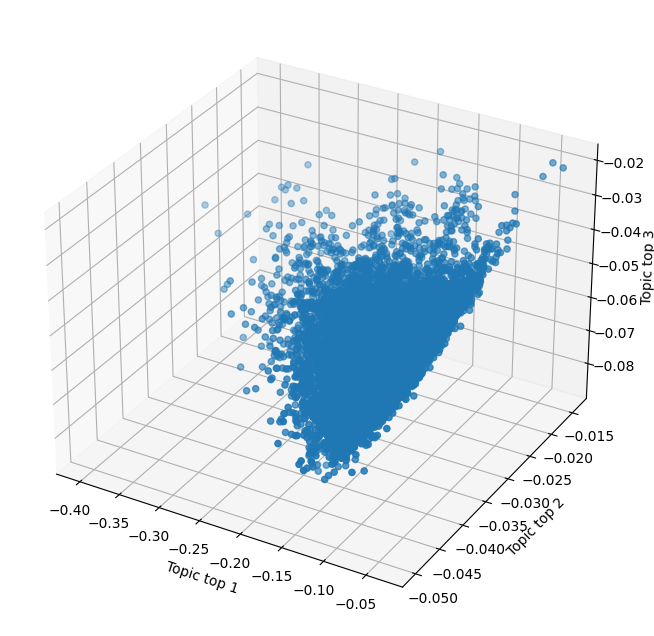

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(projection='3d')
ax.scatter(X_lsa_copy[:,0], X_lsa_copy[:,57], X_lsa_copy[:,20], marker='o')

ax.set_xlabel('Topic top 1')
ax.set_ylabel('Topic top 2')
ax.set_zlabel('Topic top 3')

plt.show()

Aplicando o PCA

(11314, 3)


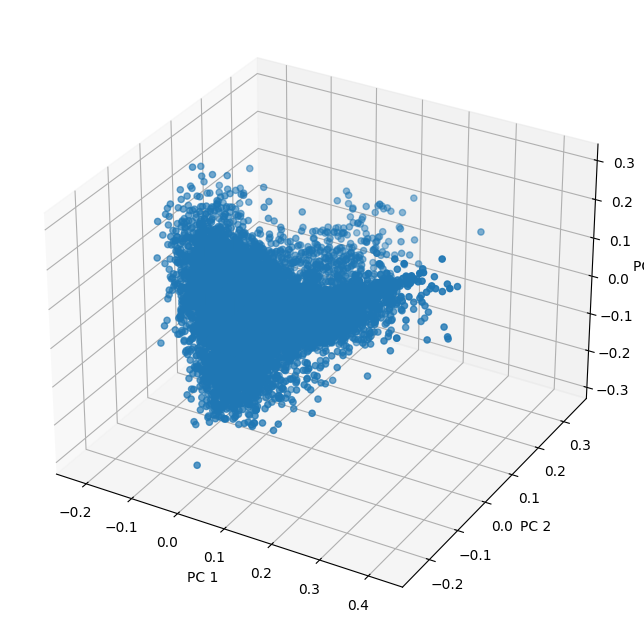

In [ ]:
from sklearn.decomposition import PCA

X_lsa_3d = PCA(n_components=3, random_state=0).fit_transform(X_lsa)
print(X_lsa_3d.shape)

fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(projection='3d')
ax.scatter(X_lsa_3d[:,0], X_lsa_3d[:,1], X_lsa_3d[:,2], marker='o')

ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')

plt.show()

## Transformando o texto de uma query em vetores de características


In [ ]:
final_list_stop_words = list_stop
query = 'could enlighten car saw day'

query_tokens = [token for token in word_tokenize(query, language='english') if not token in final_list_stop_words]
print(query_tokens)
pre_processed_query = ' '.join(query_tokens)
print(pre_processed_query)

# Extração de características de contagem
X_query = count_vect.transform([pre_processed_query])
print('1 - etapa de extração de características')
print(X_query)

# Extração de características de frequência TF-IDF
X_tfidf_query = tfidf_transformer.transform(X_query)
print('2 - etapa de extração de características')
print(X_tfidf_query)

# Extração dos embeddings da query
X_lsa_query = svd.transform(X_tfidf_query)
print('3 - etapa de extração de características')
print(X_lsa_query)

['could', 'enlighten', 'car', 'saw', 'day']
could enlighten car saw day
1 - etapa de extração de características
  (0, 518)	1
  (0, 720)	1
  (0, 782)	1
  (0, 2333)	1
2 - etapa de extração de características
  (0, 2333)	0.6030829492859906
  (0, 782)	0.4718785428991316
  (0, 720)	0.3438389821078469
  (0, 518)	0.5435037731377248
3 - etapa de extração de características
[[ 8.31994671e-02  3.14692744e-02  9.66063868e-03  4.93872714e-02
   8.75835537e-03 -5.13882602e-02 -2.54992625e-02 -1.52115572e-02
   1.40594636e-02  3.52661565e-02  9.78166237e-02 -8.04538206e-02
  -9.10899265e-02  4.49998272e-02 -3.50864115e-02  5.18203419e-02
   1.00594486e-01 -2.13506776e-03 -1.27100290e-02  4.65414948e-03
   7.58341913e-02  6.59380351e-02 -1.93584315e-02 -5.19135964e-02
  -2.24862812e-02 -7.34664436e-02  3.80622056e-03 -5.77144208e-02
   1.02192955e-02 -4.92508722e-02  1.54546436e-02 -3.23297725e-02
  -1.33089282e-02 -1.06609832e-01  3.52147294e-02 -4.39360042e-02
  -1.22382303e-01 -4.53207217e-02  1.

O código realiza uma série de etapas para processar uma consulta de texto, desde a tokenização até a extração de características de contagem, frequência TF-IDF e embeddings de consulta usando técnicas como CountVectorizer, TfidfTransformer e TruncatedSVD. O resultado final é uma representação numérica da consulta que pode ser usada para realizar comparações e buscar documentos semelhantes no espaço de características. Essa abordagem é comumente usada em sistemas de recuperação de informação e busca de documentos.

## Calcular a distância da query para os textos

### Usando LSA

In [ ]:
from sklearn.metrics import pairwise_distances
import numpy

# Matriz de vetores dos documentos -> X_lsa
# Vetor da query -> X_lsa_query
# Recuperar k documentos mais relevantes a query
k =

ouput_distances = pairwise_distances(X_lsa, X_lsa_query, metric='euclidean')[:,0] # Calcula as distâncias euclidianas entre cada vetor de documento em 'X_lsa' e o vetor da consulta em 'X_lsa_query'.
                                                                                  # '[:, 0]': Seleciona a primeira coluna do resultado, que contém as distâncias entre os documentos e a consulta.
sorted_distances = list(sorted(ouput_distances))[:k] #  Ordena as distâncias em ordem crescente e seleciona os primeiros k elementos, obtendo assim as distâncias dos k documentos mais relevantes
sorted_indexes = list(numpy.argsort(ouput_distances)[:k]) # Obtém os índices dos documentos ordenados pelas distâncias crescentes e seleciona os primeiros k índices, indicando os documentos mais relevantes.

print(query)
for id_doc, dist in zip(sorted_indexes, sorted_distances):
    print('Doc id: ', id_doc, ' Distance: ', dist)

could enlighten car saw day
Doc id:  0  Distance:  0.7108980682445418
Doc id:  8266  Distance:  0.7460116229075379
Doc id:  1082  Distance:  0.7547256404279493
Doc id:  8013  Distance:  0.7649103918257153
Doc id:  5553  Distance:  0.7656476481855926
Doc id:  7993  Distance:  0.769470043684699
Doc id:  659  Distance:  0.7786332758734377
Doc id:  8364  Distance:  0.7809038264337371
Doc id:  2845  Distance:  0.7850987098245911
Doc id:  1224  Distance:  0.7934768751822702


O código finaliza exibindo os resultados da busca, indicando os IDs dos documentos mais relevantes e as distâncias euclidianas correspondentes em relação à consulta. Essa abordagem é uma maneira comum de encontrar documentos semelhantes em espaços vetoriais de alta dimensão, especialmente após a redução de dimensionalidade realizada pelo TruncatedSVD.

### Usando TF-IDF

In [ ]:
k = 10

ouput_distances = pairwise_distances(X_tfidf, X_tfidf_query, metric='euclidean')[:,0]
sorted_distances = list(sorted(ouput_distances))[:k]
sorted_indexes = list(numpy.argsort(ouput_distances)[:k])

print('Distância usando TF-IDF')
print(query)
for id_doc, dist in zip(sorted_indexes, sorted_distances):
    print('Doc id: ', id_doc, ' Distance: ', dist)

Distância usando TF-IDF
could enlighten car saw day
Doc id:  0  Distance:  1.0522104672706079
Doc id:  8013  Distance:  1.1022427904099312
Doc id:  8266  Distance:  1.123940251668822
Doc id:  4640  Distance:  1.130918486887236
Doc id:  958  Distance:  1.1462422812755964
Doc id:  7993  Distance:  1.1505624360813556
Doc id:  3819  Distance:  1.1779922066025503
Doc id:  1082  Distance:  1.1788043280205298
Doc id:  596  Distance:  1.1790249117524847
Doc id:  9648  Distance:  1.182177922228025


### Usando Vectorizer

In [ ]:
k = 10

ouput_distances = pairwise_distances(X, X_query, metric='euclidean')[:,0]
sorted_distances = list(sorted(ouput_distances))[:k]
sorted_indexes = list(numpy.argsort(ouput_distances)[:k])

print('Distância usando Count Vectorizer')
print(query)
for id_doc, dist in zip(sorted_indexes, sorted_distances):
    print('Doc id: ', id_doc, ' Distance: ', dist)

Distância usando Count Vectorizer
could enlighten car saw day
Doc id:  6324  Distance:  2.6457513110645907
Doc id:  5639  Distance:  3.1622776601683795
Doc id:  5345  Distance:  3.1622776601683795
Doc id:  9622  Distance:  3.1622776601683795
Doc id:  9573  Distance:  3.1622776601683795
Doc id:  9989  Distance:  3.3166247903554
Doc id:  800  Distance:  3.3166247903554
Doc id:  4003  Distance:  3.4641016151377544
Doc id:  9533  Distance:  3.4641016151377544
Doc id:  8602  Distance:  3.4641016151377544


## Classificador de texto
### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf_tfidf = RandomForestClassifier(n_estimators=500, n_jobs=-1, max_features=5, max_depth=5, oob_score=True, verbose=2, random_state=0)

### Treinando com TF-IDF

In [ ]:
y = raw_documents_train[1]
print(y.shape)
rf_clf_tfidf.fit(X_tfidf, y)

(11314,)
building tree 1 of 500
building tree 2 of 500
building tree 3 of 500
building tree 4 of 500


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.2s


building tree 5 of 500
building tree 6 of 500
building tree 7 of 500
building tree 8 of 500
building tree 9 of 500
building tree 10 of 500
building tree 11 of 500
building tree 12 of 500building tree 13 of 500

building tree 14 of 500
building tree 15 of 500
building tree 16 of 500
building tree 17 of 500
building tree 18 of 500
building tree 19 of 500
building tree 20 of 500
building tree 21 of 500
building tree 22 of 500
building tree 23 of 500
building tree 24 of 500
building tree 25 of 500
building tree 26 of 500
building tree 27 of 500
building tree 28 of 500
building tree 29 of 500
building tree 30 of 500
building tree 31 of 500
building tree 32 of 500
building tree 33 of 500
building tree 34 of 500
building tree 35 of 500
building tree 36 of 500
building tree 37 of 500
building tree 38 of 500
building tree 39 of 500
building tree 40 of 500
building tree 41 of 500
building tree 42 of 500
building tree 43 of 500
building tree 44 of 500building tree 45 of 500

building tree 46 of 5

[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:    0.7s


building tree 181 of 500
building tree 182 of 500
building tree 183 of 500
building tree 184 of 500
building tree 185 of 500
building tree 186 of 500
building tree 187 of 500
building tree 188 of 500
building tree 189 of 500
building tree 190 of 500
building tree 191 of 500
building tree 192 of 500
building tree 193 of 500
building tree 194 of 500
building tree 195 of 500
building tree 196 of 500
building tree 197 of 500
building tree 198 of 500
building tree 199 of 500
building tree 200 of 500
building tree 201 of 500building tree 202 of 500

building tree 203 of 500building tree 204 of 500

building tree 205 of 500
building tree 206 of 500
building tree 207 of 500
building tree 208 of 500
building tree 209 of 500
building tree 210 of 500
building tree 211 of 500
building tree 212 of 500
building tree 213 of 500
building tree 214 of 500
building tree 215 of 500
building tree 216 of 500
building tree 217 of 500
building tree 218 of 500
building tree 219 of 500
building tree 220 of 500


[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:    1.7s


building tree 405 of 500
building tree 406 of 500
building tree 407 of 500
building tree 408 of 500
building tree 409 of 500
building tree 410 of 500
building tree 411 of 500
building tree 412 of 500
building tree 413 of 500
building tree 414 of 500
building tree 415 of 500
building tree 416 of 500
building tree 417 of 500
building tree 418 of 500
building tree 419 of 500
building tree 420 of 500
building tree 421 of 500
building tree 422 of 500
building tree 423 of 500
building tree 424 of 500
building tree 425 of 500
building tree 426 of 500
building tree 427 of 500
building tree 428 of 500
building tree 429 of 500
building tree 430 of 500
building tree 431 of 500
building tree 432 of 500
building tree 433 of 500
building tree 434 of 500
building tree 435 of 500
building tree 436 of 500
building tree 437 of 500
building tree 438 of 500
building tree 439 of 500
building tree 440 of 500
building tree 441 of 500
building tree 442 of 500
building tree 443 of 500
building tree 444 of 500


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.3s finished


RandomForestClassifier(max_depth=5, max_features=5, n_estimators=500, n_jobs=-1,
                       oob_score=True, random_state=0, verbose=2)

In [ ]:
acuracia = rf_clf_tfidf.score(X_tfidf, y)
print('Média da acurácia das classes: ', acuracia)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done 361 tasks      | elapsed:    1.5s


Média da acurácia das classes:  0.7602085911260386


[Parallel(n_jobs=2)]: Done 500 out of 500 | elapsed:    2.1s finished


## Treinando uma RandomForest com as features LSA (tópicos) dos documentos

In [ ]:
rf_clf_lsa = RandomForestClassifier(n_estimators=500, n_jobs=-1, max_features=5, max_depth=5, oob_score=True, verbose=2, random_state=0)
rf_clf_lsa.fit(X_lsa, y)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 500building tree 2 of 500

building tree 3 of 500
building tree 4 of 500
building tree 5 of 500
building tree 6 of 500
building tree 7 of 500
building tree 8 of 500
building tree 9 of 500
building tree 10 of 500
building tree 11 of 500
building tree 12 of 500
building tree 13 of 500
building tree 14 of 500
building tree 15 of 500
building tree 16 of 500
building tree 17 of 500
building tree 18 of 500
building tree 19 of 500
building tree 20 of 500
building tree 21 of 500
building tree 22 of 500
building tree 23 of 500building tree 24 of 500

building tree 25 of 500
building tree 26 of 500
building tree 27 of 500
building tree 28 of 500
building tree 29 of 500
building tree 30 of 500
building tree 31 of 500
building tree 32 of 500
building tree 33 of 500
building tree 34 of 500
building tree 35 of 500
building tree 36 of 500
building tree 37 of 500
building tree 38 of 500
building tree 39 of 500
building tree 40 of 500


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    1.1s


building tree 41 of 500
building tree 42 of 500
building tree 43 of 500
building tree 44 of 500
building tree 45 of 500
building tree 46 of 500
building tree 47 of 500
building tree 48 of 500
building tree 49 of 500
building tree 50 of 500
building tree 51 of 500
building tree 52 of 500
building tree 53 of 500
building tree 54 of 500
building tree 55 of 500
building tree 56 of 500
building tree 57 of 500
building tree 58 of 500
building tree 59 of 500
building tree 60 of 500
building tree 61 of 500
building tree 62 of 500
building tree 63 of 500
building tree 64 of 500
building tree 65 of 500
building tree 66 of 500
building tree 67 of 500
building tree 68 of 500
building tree 69 of 500
building tree 70 of 500
building tree 71 of 500
building tree 72 of 500
building tree 73 of 500
building tree 74 of 500
building tree 75 of 500
building tree 76 of 500
building tree 77 of 500
building tree 78 of 500
building tree 79 of 500
building tree 80 of 500
building tree 81 of 500
building tree 82

[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:    6.5s


building tree 164 of 500
building tree 165 of 500
building tree 166 of 500
building tree 167 of 500
building tree 168 of 500
building tree 169 of 500
building tree 170 of 500
building tree 171 of 500
building tree 172 of 500
building tree 173 of 500
building tree 174 of 500
building tree 175 of 500
building tree 176 of 500
building tree 177 of 500
building tree 178 of 500
building tree 179 of 500
building tree 180 of 500
building tree 181 of 500
building tree 182 of 500
building tree 183 of 500
building tree 184 of 500
building tree 185 of 500
building tree 186 of 500
building tree 187 of 500
building tree 188 of 500
building tree 189 of 500
building tree 190 of 500
building tree 191 of 500
building tree 192 of 500
building tree 193 of 500
building tree 194 of 500
building tree 195 of 500
building tree 196 of 500
building tree 197 of 500
building tree 198 of 500
building tree 199 of 500
building tree 200 of 500
building tree 201 of 500
building tree 202 of 500
building tree 203 of 500


[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:   12.2s


building tree 370 of 500
building tree 371 of 500
building tree 372 of 500
building tree 373 of 500
building tree 374 of 500
building tree 375 of 500
building tree 376 of 500
building tree 377 of 500
building tree 378 of 500
building tree 379 of 500
building tree 380 of 500
building tree 381 of 500
building tree 382 of 500
building tree 383 of 500
building tree 384 of 500
building tree 385 of 500
building tree 386 of 500
building tree 387 of 500
building tree 388 of 500
building tree 389 of 500
building tree 390 of 500
building tree 391 of 500
building tree 392 of 500
building tree 393 of 500
building tree 394 of 500
building tree 395 of 500
building tree 396 of 500building tree 397 of 500

building tree 398 of 500
building tree 399 of 500
building tree 400 of 500
building tree 401 of 500
building tree 402 of 500
building tree 403 of 500
building tree 404 of 500
building tree 405 of 500
building tree 406 of 500
building tree 407 of 500
building tree 408 of 500
building tree 409 of 500


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   16.0s finished


RandomForestClassifier(max_depth=5, max_features=5, n_estimators=500, n_jobs=-1,
                       oob_score=True, random_state=0, verbose=2)

In [ ]:
print('Média da acurácia das classes: ', rf_clf_lsa.score(X_lsa, y))

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 361 tasks      | elapsed:    1.2s


Média da acurácia das classes:  0.7724942549054269


[Parallel(n_jobs=2)]: Done 500 out of 500 | elapsed:    1.7s finished


# Avaliação do classificador com a base teste


In [ ]:
# Obter a base de teste
raw_documents_test = fetch_20newsgroups(subset='test', return_X_y=True)

test_documents, y_test = raw_documents_test

# Pre processamento
documents_tokens = []
for doc in test_documents:
    documents_tokens.append(
        [token.lower() for token in word_tokenize(doc, language='english') if not token.lower() in final_list_stop_words]
    )
pre_processed_documents_test = [' '.join(doc) for doc in documents_tokens]

# Extração de características de contagem
X_test = count_vect.transform(pre_processed_documents_test)
print('1a etapa de extração de características')
print(X_test.shape)

# Extração de características de frequência TF-IDF
X_tfidf_test = tfidf_transformer.transform(X_test)
print('2a etapa de extração de características')
print(X_tfidf_test.shape)

# Extração dos embeddings
X_lsa_test = svd.transform(X_tfidf_test)
print('3a etapa de extração de características')
print(X_lsa_test.shape)

1a etapa de extração de características
(7532, 129796)


ValueError: ignored

In [ ]:
print('[TF-IDF] Média da acurácia das classes: ', rf_clf_tfidf.score(X_tfidf_test, y_test))
print('[LSA features] Média da acurácia das classes: ', rf_clf_lsa.score(X_lsa_test, y_test))

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 361 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s


[TF-IDF] Média da acurácia das classes:  0.6772437599575146


[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:    0.2s


[LSA features] Média da acurácia das classes:  0.5933351035581519


[Parallel(n_jobs=2)]: Done 361 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 500 out of 500 | elapsed:    0.7s finished
